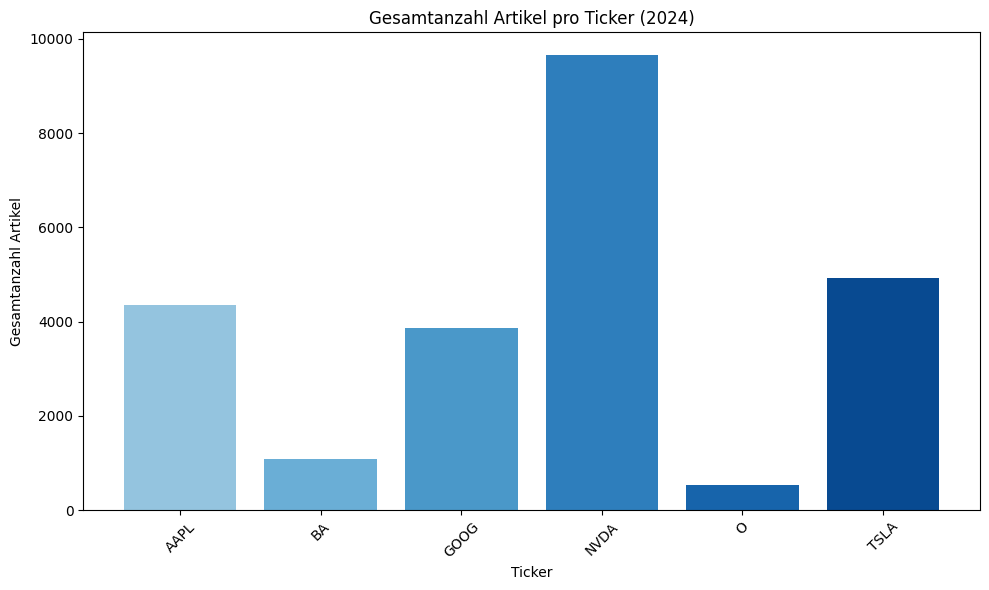

In [3]:
# 📚 Imports
from influxdb_client import InfluxDBClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 📍 InfluxDB-Verbindungsdaten
INFLUXDB_URL = "http://localhost:10896"
INFLUXDB_TOKEN = "ncWWSLDJGJVI9ibpQHOg7ckJzEgXkbbW_wS4XCx0xUSfWD4VOh_9vYmHj87q5KsNn3HdIXm9DRELoTP6d1MdkQ=="
INFLUXDB_ORG = "bdinf-org"
INFLUXDB_BUCKET = "bdinf-bucket"

# 🔌 InfluxDB Client initialisieren
client = InfluxDBClient(url=INFLUXDB_URL, token=INFLUXDB_TOKEN, org=INFLUXDB_ORG)
query_api = client.query_api()

# 📈 Flux-Query: Alle Artikel zählen, gruppiert nach Ticker
flux_query = f'''
from(bucket: "{INFLUXDB_BUCKET}")
  |> range(start: 0)  // ganze Historie
  |> filter(fn: (r) => r._measurement == "sentiment_data")
  |> filter(fn: (r) => r._field == "article_count")
  |> filter(fn: (r) => r.aggregation == "daily")
  |> group(columns: ["ticker"])
  |> sum()
  |> keep(columns: ["ticker", "_value"])
'''

# 🧾 Daten abrufen
tables = query_api.query(flux_query)
records = [record.values for table in tables for record in table.records]
df = pd.DataFrame(records)

# 🧼 DataFrame bereinigen
df_result = df[["ticker", "_value"]].rename(columns={"_value": "article_count"})

# 📊 Visualisierung
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_result)))
plt.bar(df_result["ticker"], df_result["article_count"], color=colors)
plt.xlabel("Ticker")
plt.ylabel("Gesamtanzahl Artikel")
plt.title("Gesamtanzahl Artikel pro Ticker (2024)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
